# [실습과제#3] 다층 인공신경망 구조의 분류기

In [1]:
import numpy as np 
import matplotlib.pylab as plt 

np.random.seed(2021) 

# Logical AND 연산 

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

In [3]:
x1_min = -0.5 
x1_max = 1.5 

x2_min = -0.5 
x2_max = 1.5 

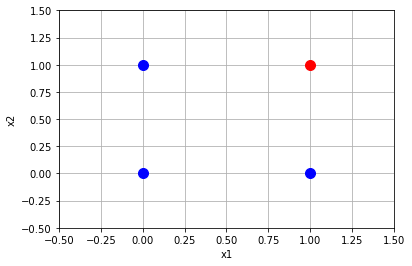

In [4]:
plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20)
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

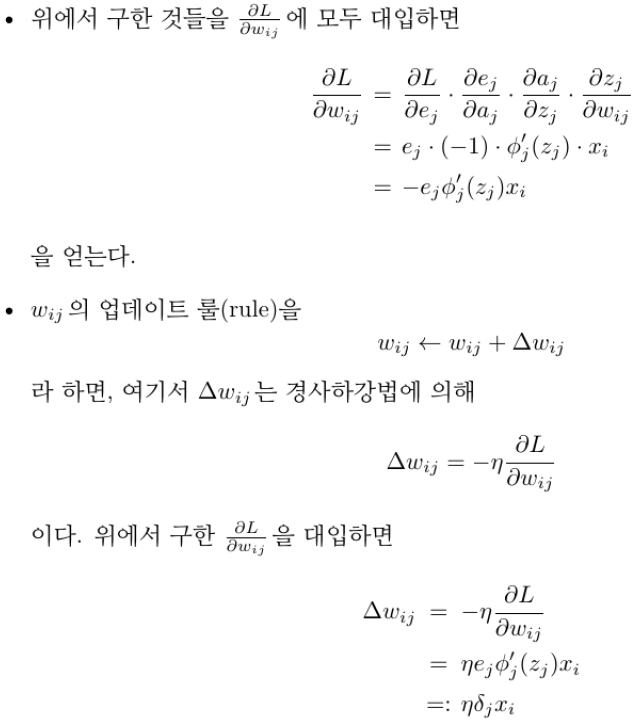

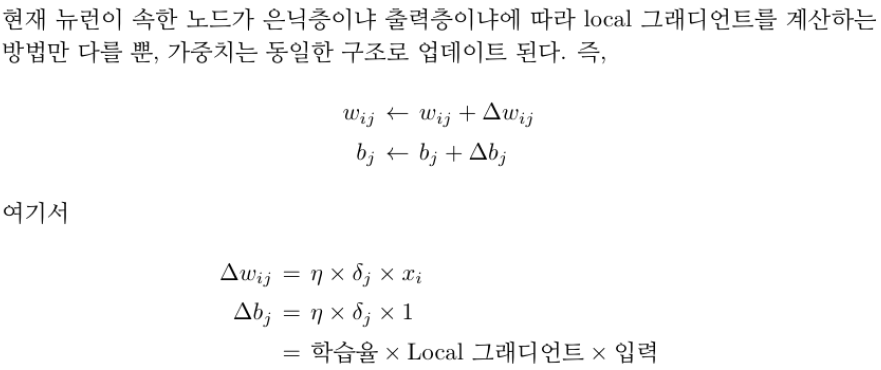

In [5]:
# [11강] 인공신경망 - Learnable machine (1).pdf 
# [6강] 로지스틱회귀_v2.pdf p.12 
# 밑바닥부터 시작하는 딥러닝 p.137 
class TwoLayer_Classifier: 
    def __init__(self, in_features=100, hidden_features=100, out_features=100, eta=0.001): 
        self.eta = eta 

        self.W1 = np.random.randn(in_features, hidden_features) 
        self.b1 = np.random.randn(1, hidden_features) 
        self.W2 = np.random.randn(hidden_features, out_features) 
        self.b2 = np.random.randn(1, out_features) 

        self.sigmoid = lambda z : 1 / (1 + np.exp(-z)) 

        self.y_hat = None 

        self.for_backward = {} 
        self.for_backward['e'] = None 
        self.for_backward['a2'] = None 
        self.for_backward['a1'] = None 
        self.for_backward['X'] = None 
        ################################################## 
        #     logistic sigmoid에 대한 편미분 구하기      # 
        ################################################## 
        self.sigmoid_prime = lambda a : a*(1 - a)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.grad = {} 
        self.grad['W2'] = None 
        self.grad['b2'] = None 
        self.grad['W1'] = None 
        self.grad['b1'] = None 

    def forward(self, X): 
        ################################################## 
        #                  순전파 구현                   # 
        ################################################## 
        """
        print(f"X shape: {X.shape}")
        print(f"W1 shape: {self.W1.shape}")
        print(f"b1 shape: {self.b1.shape}")"""
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1) 
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)
        """
        print(f"z1 shape: {z1.shape}")
        print(f"a1 shape: {a1.shape}")
        print(f"z2 shape: {z2.shape}")
        print(f"a2 shape: {a2.shape}")"""
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.y_hat = a2 

        self.for_backward['X'] = X 
        self.for_backward['a1'] = a1 
        self.for_backward['a2'] = a2 
        
        return a2 

    def mean_square_error(self, y): 
        N = y.shape[0] 

        assert N == self.y_hat.shape[0] 
        ################################################## 
        #           오차 e와 손실 loss 구하기            # 
        ################################################## 
        e = self.y_hat - y
        loss = np.square(e).mean(axis=1)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.for_backward['e'] = e 

        return loss 

    def backward(self): 
        eta = self.eta 

        e = self.for_backward['e']
        a2 = self.for_backward['a2']
        a1 = self.for_backward['a1']
        X = self.for_backward['X']
        """
        print(f"e: {e}")
        print(f"a2: {a2}")
        print(f"a1: {a1}")
        print(f"X: {X}")"""


        N = X.shape[0]
        ################################################## 
        #          역전파 구현(gradient 구하기)          # 
        ################################################## 
        #dLde = None
        #deda2 = np.tile(None, (N, 1)) 
        #da2dz2 = None 
        #dz2dW2 = None  
        #dz2db2 = np.tile(None, (N, 1)) 

        delta2 = e * self.sigmoid_prime(a2) # 위 내용들을 delta2에 한번에 통일. 식에의거.
        delta2 = (-1) * delta2  
        dLdW2 = a1.T.dot(delta2) 
        dLdb2 = np.sum(delta2, axis=0, keepdims=True) 

        # [11강] 인공신경망 - Learnable machine (1).pdf p.23 
        delta1 = (delta2.dot(self.W2.T))*self.sigmoid_prime(a1) # 아래 내용들을 delta1에 한번에 통일. 식에의거.
        #dz1dW1 = None 
        #dz1db1 = np.tile(None, (N, 1)) 
        dLdW1 = X.T.dot(delta1) 
        dLdb1 = np.sum(delta1, axis=0, keepdims=True)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.W2 = self.W2 + eta * dLdW2 
        self.W1 = self.W1 + eta * dLdW1 
        self.b2 = self.b2 + eta * dLdb2 
        self.b1 = self.b1 + eta * dLdb1 

        self.grad['W2'] = dLdW2 
        self.grad['W1'] = dLdW1 
        self.grad['b2'] = dLdb2 
        self.grad['b1'] = dLdb1 

In [14]:
################################################## 
# Logical AND 연산 구현 위한 2층 인공신경망 생성 # 
################################################## 
and_tl_clf = TwoLayer_Classifier(2, 128, 1) 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

n_iterations = 10000 
for iteration in range(n_iterations): 
    ################################################## 
    #       순전파, 손실 계산, 역전파 수행하기       # 
    ################################################## 
    y_hat = and_tl_clf.forward(X) 
    loss = and_tl_clf.mean_square_error(y)
    and_tl_clf.backward()

    if iteration % 500 == 0:
        loss = loss[0]
        print(f"iteration: {iteration}, loss: {loss}")
     
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

iteration: 0, loss: 0.9980236959100425
iteration: 500, loss: 0.9926375376294196
iteration: 1000, loss: 0.9453385312242175
iteration: 1500, loss: 0.9099906513276759
iteration: 2000, loss: 0.8584513259089512
iteration: 2500, loss: 0.7211967074611468
iteration: 3000, loss: 0.3438149521626413
iteration: 3500, loss: 0.12760395006280079
iteration: 4000, loss: 0.05972335681902474
iteration: 4500, loss: 0.024229488815660175
iteration: 5000, loss: 0.007615373745299301
iteration: 5500, loss: 0.0033923329432265334
iteration: 6000, loss: 0.0021991064245022547
iteration: 6500, loss: 0.001582125707158818
iteration: 7000, loss: 0.0011943309151812667
iteration: 7500, loss: 0.0009301595331484015
iteration: 8000, loss: 0.0007399614350992157
iteration: 8500, loss: 0.0005977047431576198
iteration: 9000, loss: 0.000488565398897799
iteration: 9500, loss: 0.00040337117885012625


In [15]:
loss

array([0.00033614, 0.01134264, 0.03700003, 0.04596975])

<결과 비교용> 

0.018781307122012106 

In [16]:
(y_hat > 0.5).astype(int).flatten()

array([0, 0, 0, 1])

<결과 비교용> 

array([0, 0, 0, 1]) 

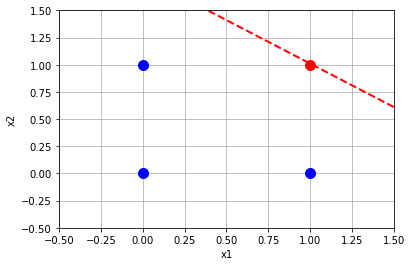

In [17]:
num_of_samples = 10
x1 = np.linspace(x1_min, x1_max, num_of_samples) 
x2 = np.linspace(x2_min, x2_max, num_of_samples) 

x1_ = np.concatenate((x1, x1))
x2_min_and_max = np.concatenate((np.full(num_of_samples, x2_min, dtype=float), np.full(num_of_samples, x2_max, dtype=float)))
X1 = np.c_[x1_, x2_min_and_max]
x2_ = np.concatenate((x2, x2))
x1_min_and_max = np.concatenate((np.full(num_of_samples, x1_min, dtype=float), np.full(num_of_samples, x1_max, dtype=float)))
X2 = np.c_[x1_min_and_max, x2_] 

# https://stackoverflow.com/questions/38073791/flatten-numpy-array-without-double-for-loop/38073913#38073913 
X_new = np.column_stack((X1.ravel(),X2.ravel())) 

y_hat = and_tl_clf.forward(X_new) 
y_hat = (y_hat > 0.5).astype(int).flatten() 

plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20) 
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20) 
plt.plot(X_new[y_hat == 1][0][:], X_new[y_hat == 1][1][:], "r--", linewidth=2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

<결과 비교용> 

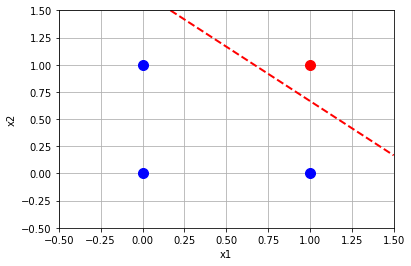

# Logical XOR 연산 

In [47]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

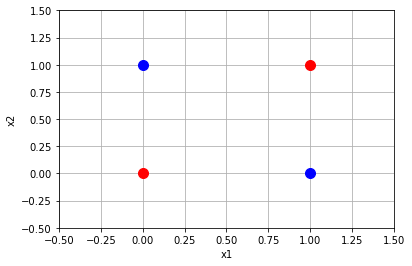

In [48]:
plt.plot(X[0::3, 0], X[0::3, 1], 'r.', markersize=20)
plt.plot(X[1:3, 0], X[1:3, 1], 'b.', markersize=20)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [49]:
# https://stackoverflow.com/questions/65643248/one-hot-encoding-from-numpy
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [50]:
y_ = get_one_hot(y.reshape(-1), 2)

In [58]:
################################################## 
# Logical XOR 연산 구현 위한 2층 인공신경망 생성 # 
################################################## 
xor_tl_clf = TwoLayer_Classifier(2, 64, 1) 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

n_iterations = 20000 
for iteration in range(n_iterations): 
    ################################################## 
    #       순전파, 손실 계산, 역전파 수행하기       # 
    ################################################## 
    y_hat = xor_tl_clf.forward(X) 
    loss = xor_tl_clf.mean_square_error(y)
    xor_tl_clf.backward()

    if iteration % 500 == 0:
        loss = loss[0]
        print(f"iteration: {iteration}, loss: {loss}")
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

iteration: 0, loss: 0.006598279560613224
iteration: 500, loss: 0.019955321185737233
iteration: 1000, loss: 0.07167363265509152
iteration: 1500, loss: 0.10608900962299915
iteration: 2000, loss: 0.10548401664541707
iteration: 2500, loss: 0.09621377297833372
iteration: 3000, loss: 0.08658235345249955
iteration: 3500, loss: 0.07814132183645439
iteration: 4000, loss: 0.07097641571073361
iteration: 4500, loss: 0.0649123782309769
iteration: 5000, loss: 0.05975795684078933
iteration: 5500, loss: 0.05534973714319551
iteration: 6000, loss: 0.051554979545841775
iteration: 6500, loss: 0.048266957398637234
iteration: 7000, loss: 0.045399787924314094
iteration: 7500, loss: 0.04288407448237693
iteration: 8000, loss: 0.04066345490517335
iteration: 8500, loss: 0.03869191098070097
iteration: 9000, loss: 0.03693167518034759
iteration: 9500, loss: 0.03535159696445536
iteration: 10000, loss: 0.033925861363754015
iteration: 10500, loss: 0.03263297815561717
iteration: 11000, loss: 0.03145497985797923
iterati

In [59]:
loss 

array([0.01989795, 0.01323935, 0.00871364, 0.9937774 ])

<결과 비교용> 

0.036086951908816056 

In [60]:
y_hat.argmax(axis=1)

array([0, 0, 0, 0])

<결과 비교용> 

array([0, 1, 1, 0]) 

---
입출력을 Bipolar representation으로 바꾸기

Hint: 데이터 입출력 값과 활성화 함수만 바꾸면 됨!

---

In [61]:
loss

array([0.01989795, 0.01323935, 0.00871364, 0.9937774 ])

<결과 비교용> 

0.0003422382344161708 

In [62]:
y_hat

array([[0.1410601 ],
       [0.88493762],
       [0.90665313],
       [0.99688385]])

<결과 비교용> 

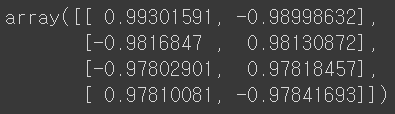

< Bipolarized y_hat > 

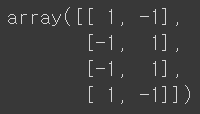

# Digit 분류(Multiclass Classification)   

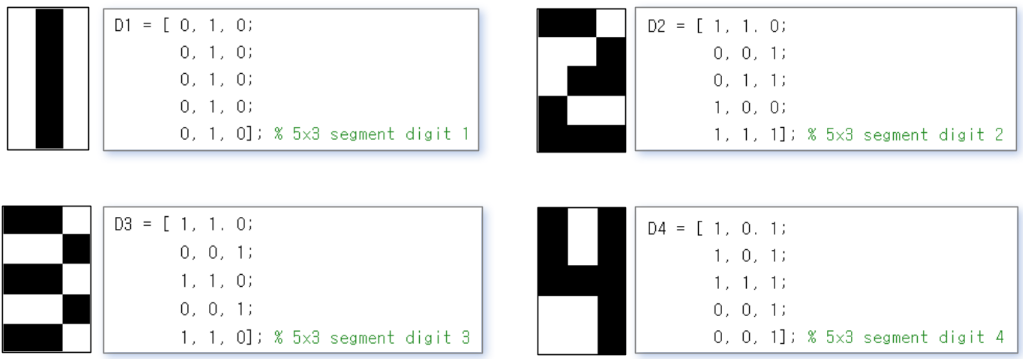

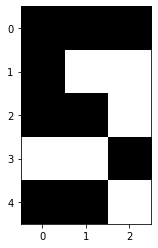

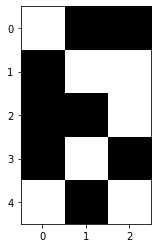

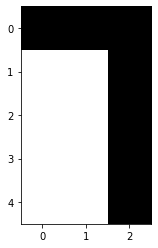

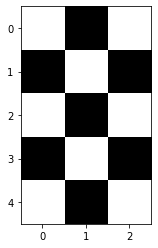

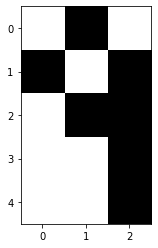

[14강] 인공신경망마무리.pptx p.14 

In [63]:
D0 = np.array([[1, 1, 1], 
               [1, 0, 1], 
               [1, 0, 1], 
               [1, 0, 1], 
               [1, 1, 1]]) 
D1 = np.array([[0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0]])
D2 = np.array([[1, 1, 0], 
               [0, 0, 1], 
               [0, 1, 1], 
               [1, 0, 0], 
               [1, 1, 1]])
D3 = np.array([[1, 1, 0], 
               [0, 0, 1], 
               [1, 1, 0], 
               [0, 0, 1], 
               [1, 1, 0]])
D4 = np.array([[1, 0, 1], 
               [1, 0, 1], 
               [1, 1, 1], 
               [0, 0, 1], 
               [0, 0, 1]])
################################################## 
#        5부터 9까지 입력 데이터 준비하기        # 
################################################## 
D5 = None 
D6 = None 
D7 = None 
D8 = None 
D9 = None 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

/var/folders/ht/4d122qr50vs5jr5k781my7yr0000gn/T/ipykernel_17206/3705500120.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array([D0, D1, D2, D3, D4, D5, D6, D7, D8, D9])


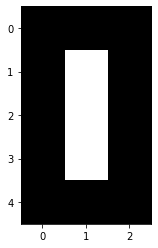

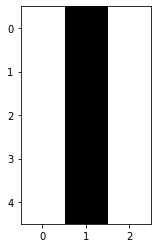

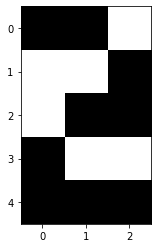

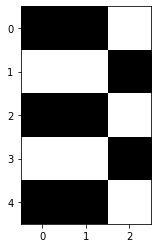

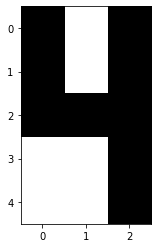

TypeError: Image data of dtype object cannot be converted to float

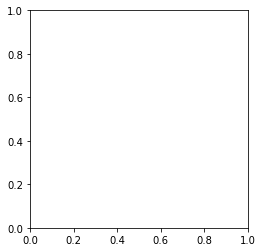

In [64]:
X = np.array([D0, D1, D2, D3, D4, D5, D6, D7, D8, D9]) 
for x in X: 
    # https://matplotlib.org/stable/api/pyplot_summary.html 
    plt.imshow(x, cmap='gray_r')
    plt.show()

In [65]:
y = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]) 
y_ = get_one_hot(y.reshape(-1), y.shape[0])

In [66]:
from scipy.special import softmax 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html 
from sklearn.metrics import log_loss as cross_entropy_loss 

In [67]:
# [6강] 로지스틱회귀_v2.pdf p.12 
# 밑바닥부터 시작하는 딥러닝 p.137 
class Digit_TwoLayer_Classifier: 
    def __init__(self, in_features=100, hidden_features=100, out_features=100, eta=0.001): 
        self.eta = eta 

        self.W1 = np.random.randn(in_features, hidden_features) 
        self.b1 = np.random.randn(1, hidden_features) 
        self.W2 = np.random.randn(hidden_features, out_features) 
        self.b2 = np.random.randn(1, out_features) 

        self.sigmoid = lambda z : 1 / (1 + np.exp(-z)) 
        self.softmax = softmax 

        self.y_hat = None 

        self.for_backward = {} 
        self.for_backward['y'] = None 
        self.for_backward['a1'] = None 
        self.for_backward['X'] = None 

        ################################################## 
        #     logistic sigmoid에 대한 편미분 구하기      # 
        ################################################## 
        self.sigmoid_prime = lambda a : None 
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.softmax_prime = lambda y_hat, y : (y_hat - y) / y.shape[0]

        self.grad = {} 
        self.grad['W2'] = None 
        self.grad['b2'] = None 
        self.grad['W1'] = None 
        self.grad['b1'] = None 

    def forward(self, X): 
        ################################################## 
        #                  순전파 구현                   # 
        ################################################## 
        
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1) 
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.y_hat = a2 

        self.for_backward['X'] = X 
        self.for_backward['a1'] = a1 

        return a2 

    def cross_entropy_error(self, y): 
        N = y.shape[0] 

        assert N == self.y_hat.shape[0] 
        ################################################## 
        #                손실 loss 구하기                # 
        ################################################## 
        loss = None 
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.for_backward['y'] = y 

        return loss 

    def backward(self): 
        eta = self.eta 

        y = self.for_backward['y'] 
        a1 = self.for_backward['a1']
        X = self.for_backward['X']

        N = X.shape[0]
        ################################################## 
        #          역전파 구현(gradient 구하기)          # 
        ################################################## 
        delta2 = None 
        delta2 = (-1) * delta2 
        dz2dW2 = None 
        dz2db2 = np.tile(None, (N, 1)) 
        dLdW2 = None.T.dot(None) 
        dLdb2 = None.T.dot(None) 

        # [11강] 인공신경망 - Learnable machine (1).pdf p.23 
        delta1 = None 
        dz1dW1 = None 
        dz1db1 = np.tile(None, (N, 1)) 
        dLdW1 = None.T.dot(None) 
        dLdb1 = None.T.dot(None) 
        ################################################## 
        #                  코드 작성 끝                  # 
        ################################################## 
        self.W2 = self.W2 + eta * dLdW2 
        self.W1 = self.W1 + eta * dLdW1 
        self.b2 = self.b2 + eta * dLdb2 
        self.b1 = self.b1 + eta * dLdb1 

        self.grad['W2'] = dLdW2 
        self.grad['W1'] = dLdW1 
        self.grad['b2'] = dLdb2 
        self.grad['b1'] = dLdb1 

In [68]:
X_ = X.reshape(X.shape[0], -1).copy()

In [69]:
################################################## 
#     0~9 숫자 분류 위한 2층 인공신경망 생성     # 
################################################## 
d_tl_clf = None 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

n_iterations = 10000 
for iteration in range(n_iterations): 
    ################################################## 
    #       순전파, 손실 계산, 역전파 수행하기       # 
    ################################################## 
    y_hat = None 
    loss = None 
    pass 
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

In [43]:
loss

<결과 비교용> 

0.05799271738956865 

In [ ]:
y_hat.argmax(axis=1)

<결과 비교용> 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

---
Scikit-learn 
---


In [71]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html 
from sklearn.neural_network import MLPClassifier 
################################################## 
#  MLPClassifier로 Digit 분류기 구현(생성&훈련)  # 
################################################## 
d_mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
pass 
################################################## 
#                  코드 작성 끝                  # 
################################################## 

<결과 비교용> 

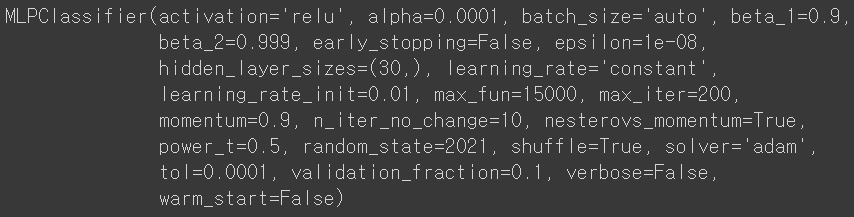

In [72]:
d_mlp_clf.predict(X_)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<결과 비교용> 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

---
오른쪽으로 한 칸씩 이동하여서 분류 결과 보기 
---

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.roll.html 
np.roll(D0, 1, axis=1)

array([[1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [ ]:
for x in X: 
    ################################################## 
    # Digit 마다 우측으로 한 칸씩 이동하여 분류 하기 # 
    ################################################## 
    x_shifted = None 
    x_shifted = x_shifted.flatten() 
    print(None, end=' ')
    ################################################## 
    #                  코드 작성 끝                  # 
    ################################################## 

<결과 비교용> 

0 7 0 6 2 2 1 0 0 0 